###1) Varíen la cantidad de componentes principales con las que se quedan, para graficar el error cuadrático medio en función de la cantidad de componentes principales. Repita el mismo procedimiento para el porcentaje de energía

In [ ]:
import tensorflow as tf
from urllib import request
import numpy as np
import matplotlib.pyplot as plt

example1_url="https://raw.githubusercontent.com/CSC-CONICET/CURSO-LEARNING1/main/datasets/prostata_label.csv"
f = request.urlopen(example1_url)
dataset1 = np.loadtxt(f, dtype=str, delimiter=",", skiprows=1)

example2_url="https://raw.githubusercontent.com/CSC-CONICET/CURSO-LEARNING1/main/datasets/prostata_data.csv"
f = request.urlopen(example2_url)
dataset2 = np.loadtxt(f, dtype=str, delimiter=",", skiprows=1)

def curar_datos(dataset):
  return dataset[:,1] != ''

labels_dataset = dataset1[curar_datos(dataset1)]
conc_dataset = dataset2[curar_datos(dataset1)]

x_train_str = conc_dataset[:,1:]
y_train_str = labels_dataset[:,1]

outputs = {
    "healthy": 0,
    "cancer": 1,
    "post-surgery": 2,
    "benign": 3
}

Y = np.array([])
for cat in y_train_str:
  Y = np.append(Y, outputs[cat])

X = x_train_str.astype(float)

Normalización sin varianza

In [ ]:
n,dx=np.shape(X)
medias = np.mean(X,axis=0)
X0=X-medias

Error cuadrático medio para cada dimensión

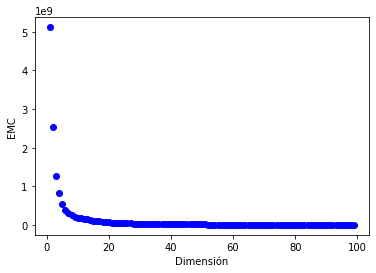

In [ ]:
from sklearn import decomposition

dims = list(np.arange(1,100))
ecm = []
for dim in range(1,100):
  pca = decomposition.PCA(n_components=dim)
  pca.fit(X0)
  U = pca.transform(X0)
  Xh = pca.inverse_transform(U)
  ECM = np.sum((X0-Xh)**2)/n
  ecm.append(ECM)

plt.scatter(dims, ecm, c= "blue")
plt.xlabel("Dimensión")
plt.ylabel("EMC")
plt.show()

Porcentaje de energía

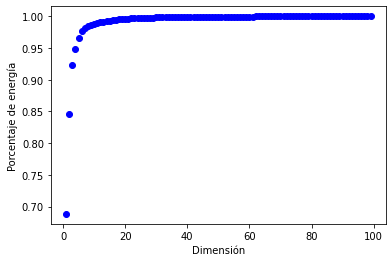

In [ ]:
pca = decomposition.PCA(n_components=99) # 99 componentes principales
pca.fit(X0)
U = pca.transform(X0) 
Xh = pca.inverse_transform(U)
ave = pca.components_
ava = pca.explained_variance_

energia_autovalores = []
autovalores = []
for autovalor in ava:
  autovalores.append(autovalor)
  energia_autovalores.append(sum(autovalores) / sum(ava))

plt.scatter(dims, energia_autovalores, c= "blue")
plt.xlabel("Dimensión")
plt.ylabel("Porcentaje de energía")
plt.show()

###2) Grafique las dos componentes principales, marcando con colores distintos cada clase. ¿Que clase aparenta ser más fácil de clasificar?


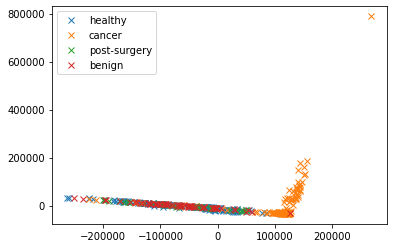

In [ ]:
for name, label in [("healthy", 0), ("cancer", 1), ("post-surgery", 2), ("benign", 3)]:
  plt.plot(U[Y==label,0],U[Y==label,1],'x',label=name)
plt.legend()  
plt.show()  

La clase que aparenta ser más facil de clasificar son los de cancer.